In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import re
from ast import literal_eval
import matplotlib.patches as patches

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [86]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/FigureS13/"

In [58]:
coexistData = pd.read_csv(readdata_dir+'CoexsitAlleleinSpecies/speciesCoexsitAllels.tsv',sep ="\t")
coexistData

,species,allelePair,allele1_big,allele2_small,bin,Nsp,segment
0,"['Yarrowia_deformans', 'Yarrowia_keelungensis'...","('143T', '163I')",-2.740568,-8.207916,bin1,298,2
1,"['Candida_parapsilosis', 'Candida_apicola']","('143I', '163I')",-0.033550,-8.207916,bin1,43,2
2,['yHMPu5000034748_Lipomyces_oligophaga'],"('137G', '163I')",1.642935,-8.207916,bin1,40,2
3,"['Yarrowia_deformans', 'yHMPu5000035645_Yarrow...","('141C', '163I')",0.893600,-8.207916,bin1,258,2
4,"['yHMPu5000035643_Yarrowia_bubula', 'yHMPu5000...","('144D', '163I')",0.758992,-8.207916,bin1,193,2
...,...,...,...,...,...,...,...
812,"['yHMPu5000035044_Barnettozyma_californica', '...","('171A', '198I')",1.236126,0.759107,bin4,3300,4
813,"['Candida_infanticola', 'Alloascoidea_hylecoet...","('171A', '198L')",1.236126,0.822249,bin4,1059,4
814,"['yHMPu5000035335_Candida_blattae', 'yHMPu5000...","('169Q', '170G')",1.325175,0.981036,bin4,2712,3
815,"['yHAB155_Kazachstania_spencerorum', 'Kazachst...","('73A', '93V')",1.489341,1.482571,bin4,61,7


In [59]:
#make a list to label such AA states are not in extant species!
sc_data =pd.read_csv(readdata_dir + "DeepLearningWeights/DLWeightsFI.tsv",sep ="\t")
experiment_assay_AA = sc_data["AAstate"].values
extant_aa_list = [ ]
for single_allele in coexistData["allelePair"].values:
    single_allele_list = literal_eval(single_allele)
    a,b = single_allele_list
    extant_aa_list.append(a)
    extant_aa_list.append(b)
non_extant_aa_list = [ ]

for measured_aa in experiment_assay_AA:
    if measured_aa not in extant_aa_list:
        non_extant_aa_list.append(measured_aa)
        
##only label the corresbinding name of the AAstates which has less than 10 times, just use this !!!!
label_aastates_list = [ ]
for single_pair , single_count in zip(coexistData["allelePair"].values,
                                     coexistData["Nsp"].values):
    if single_count >= 20:
        single_pair_list = literal_eval(single_pair)
        a,b = single_pair_list
        label_aastates_list.append(a)
        label_aastates_list.append(b)
label_aastates_list

['143T',
 '163I',
 '143I',
 '163I',
 '137G',
 '163I',
 '141C',
 '163I',
 '144D',
 '163I',
 '140F',
 '163I',
 '157T',
 '163I',
 '160V',
 '163I',
 '139A',
 '163I',
 '141C',
 '163V',
 '143I',
 '163V',
 '160V',
 '163V',
 '140F',
 '163V',
 '142F',
 '163V',
 '144N',
 '163V',
 '143T',
 '163V',
 '137S',
 '163V',
 '137G',
 '163V',
 '144D',
 '163V',
 '157T',
 '163V',
 '141S',
 '163V',
 '157T',
 '163L',
 '160V',
 '163L',
 '137G',
 '163L',
 '143I',
 '163L',
 '144D',
 '163L',
 '73G',
 '66Y',
 '73A',
 '66Y',
 '93A',
 '66Y',
 '29P',
 '25K',
 '18S',
 '25K',
 '26A',
 '25K',
 '172G',
 '200T',
 '171A',
 '200T',
 '173V',
 '200T',
 '59V',
 '62F',
 '60A',
 '62F',
 '77I',
 '62F',
 '79L',
 '62F',
 '80Y',
 '62F',
 '82V',
 '62F',
 '85I',
 '62F',
 '78L',
 '62F',
 '110P',
 '131S',
 '110T',
 '131S',
 '111F',
 '131S',
 '111I',
 '131S',
 '110N',
 '131S',
 '110H',
 '131S',
 '112K',
 '131S',
 '114I',
 '131S',
 '110E',
 '131S',
 '106D',
 '131S',
 '108M',
 '131S',
 '106K',
 '131S',
 '119H',
 '96S',
 '119Y',
 '96S',
 '12

In [75]:
def drow_box(pos,sc_score,ax,subname,count,site_N,yrange):
    if subname not in extant_aa_list:
        greenColor = "palegreen"
        purpleColor =  "plum"
    else:
        greenColor = "limegreen"
        purpleColor = "mediumorchid"
    if subname not in label_aastates_list:
        alphaColor = 0
    else:
        alphaColor = 1
    if count == 1:
        if sc_score > 0:
            ax.add_patch(patches.Rectangle((pos,sc_score), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5,
                                           facecolor = greenColor,zorder = 1,label = "SC"))
            if alphaColor == 1:
                plt.text(pos+site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color = "white" )
        else:
            ax.add_patch(patches.Rectangle((pos,sc_score), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5, facecolor = purpleColor ,
                                           zorder = 1,label = "Non-SC"))
            if alphaColor == 1:
                plt.text(pos+site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color = "white" )
    else:
        if sc_score > 0:
            ax.add_patch(patches.Rectangle((pos,sc_score  ), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5, facecolor =  greenColor,
                                           zorder = 1))
            if alphaColor == 1:
                plt.text(pos + site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color =  "white")
        else:
            ax.add_patch(patches.Rectangle((pos,sc_score), site_N/15, yrange/15, edgecolor = "black",linewidth = 0.5, facecolor = purpleColor  ,        
                                           zorder = 1))
            if alphaColor == 1:
                plt.text(pos + site_N/500,sc_score + yrange/40
                         ,subname,fontsize = 7,color = "white" )        
    
    
def add_arrow(pair1,pair2,count,site_N):
    pair1_pos = [int(i) for i in re.findall("\d+", pair1)][0]
    pair2_pos = [int(i) for i in re.findall("\d+", pair2)][0]
    pair1_index = unique_pos_list.index(pair1_pos)
    pair2_index = unique_pos_list.index(pair2_pos)
    pair1_fi = sc_data[sc_data["AAstate"] == pair1]["FI_mean"].values[0]
    pair2_fi = sc_data[sc_data["AAstate"] == pair2]["FI_mean"].values[0]
    lw = count/2500
    plt.plot([pair1_index + site_N/30,pair2_index+ site_N/30],[pair1_fi,pair2_fi],linewidth = lw,color = "k",zorder = 0)

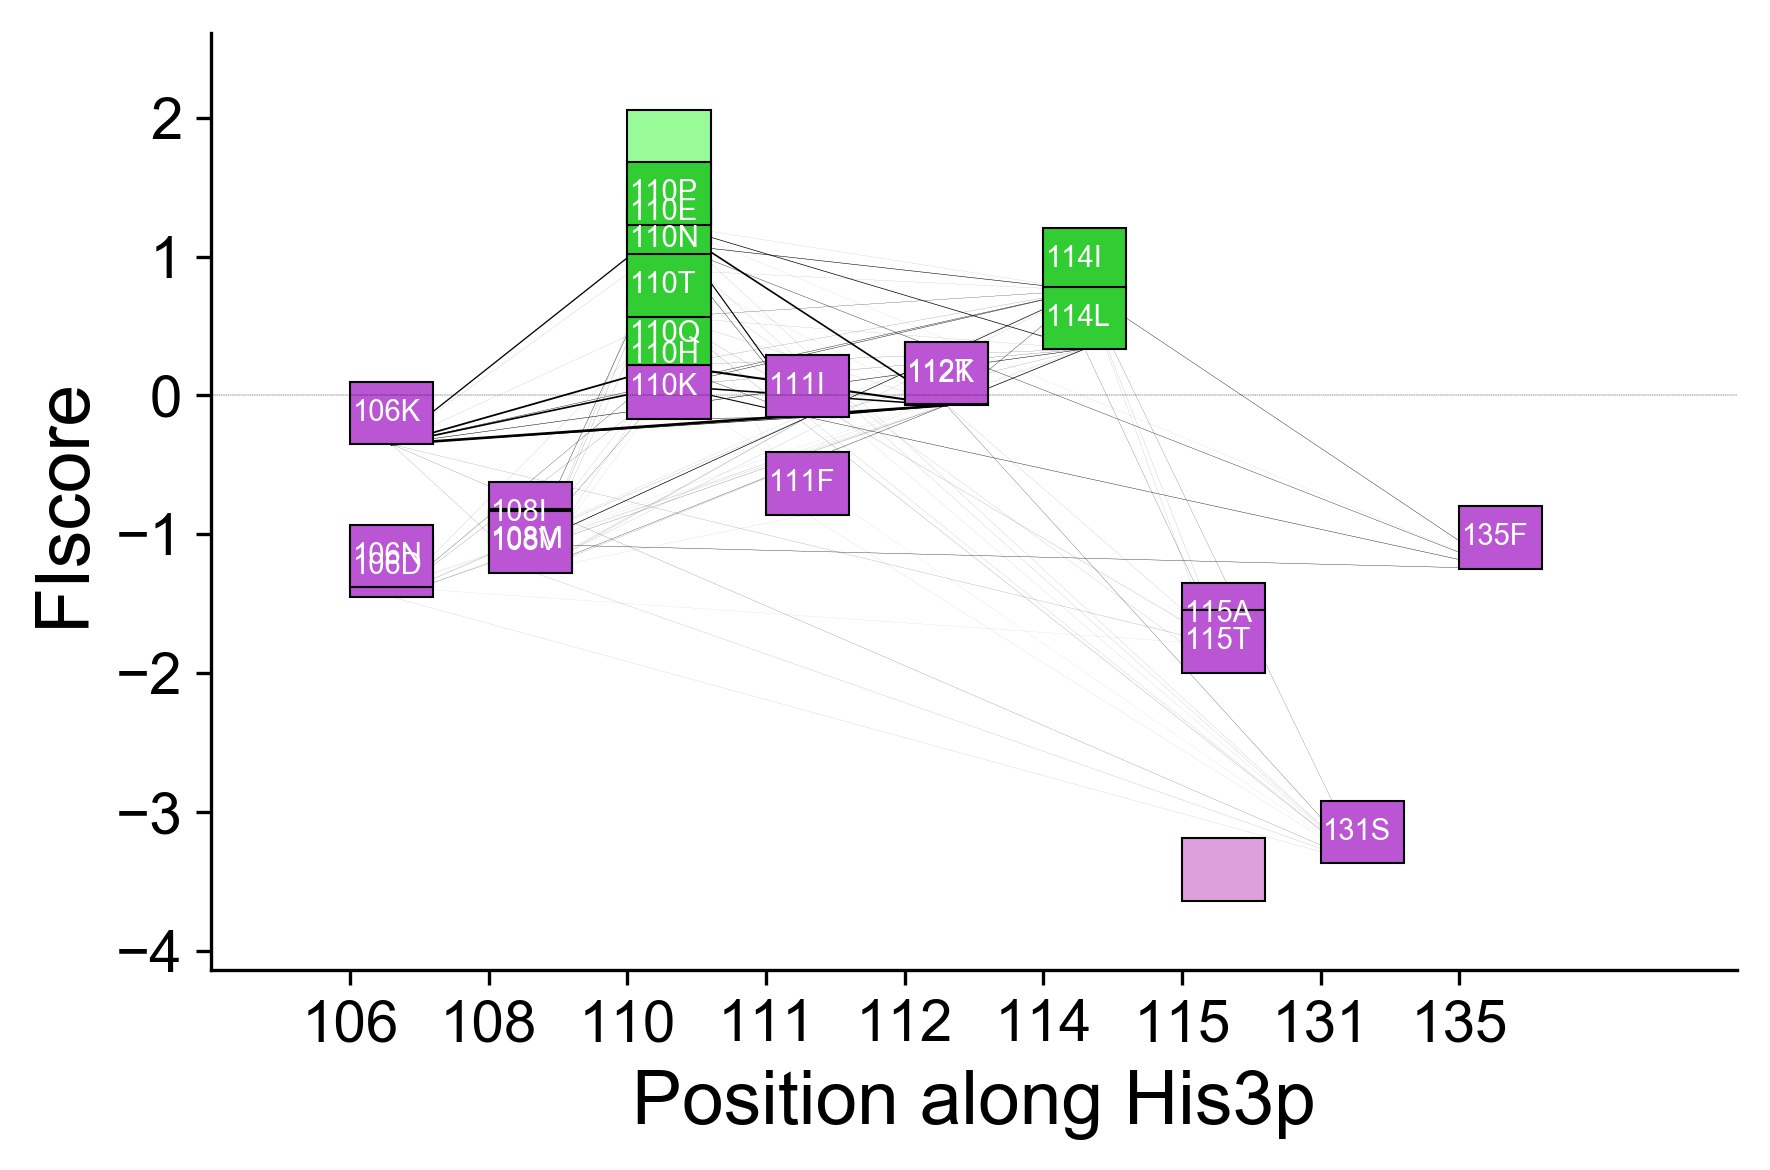

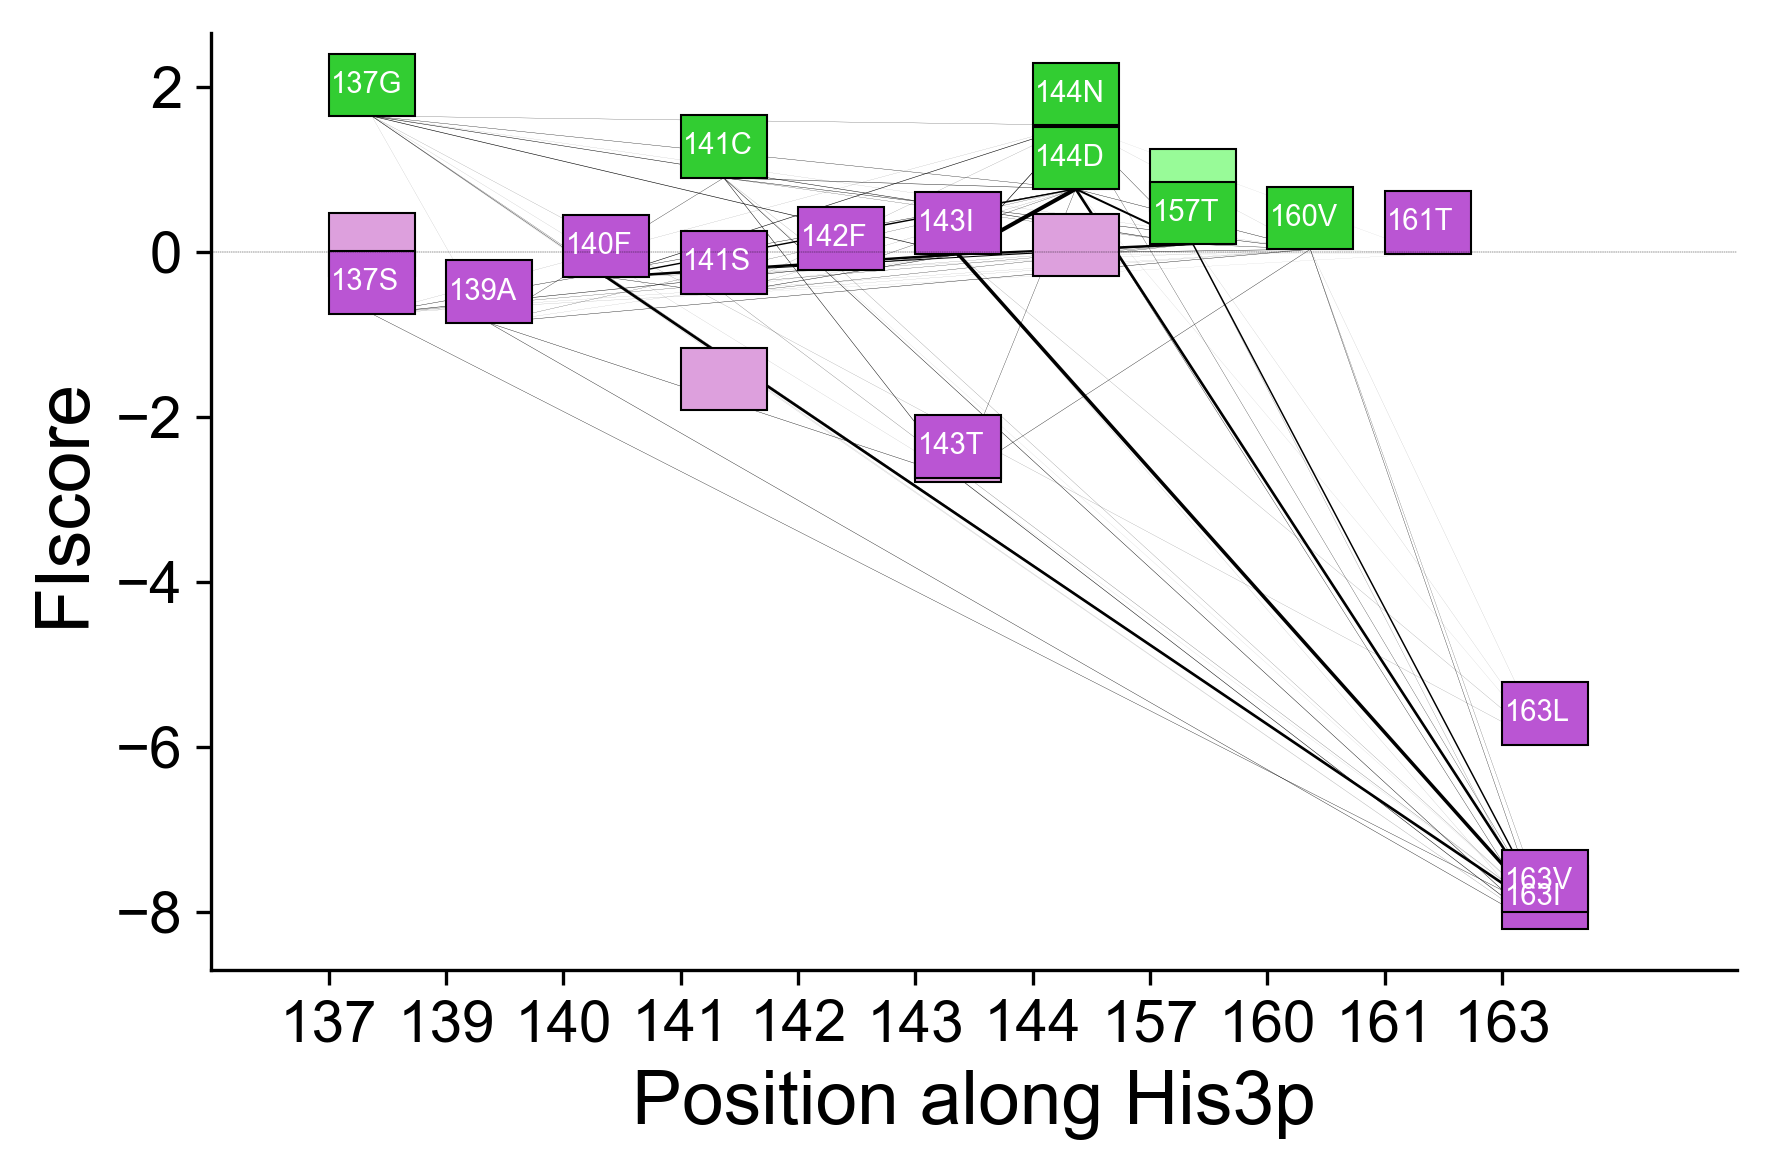

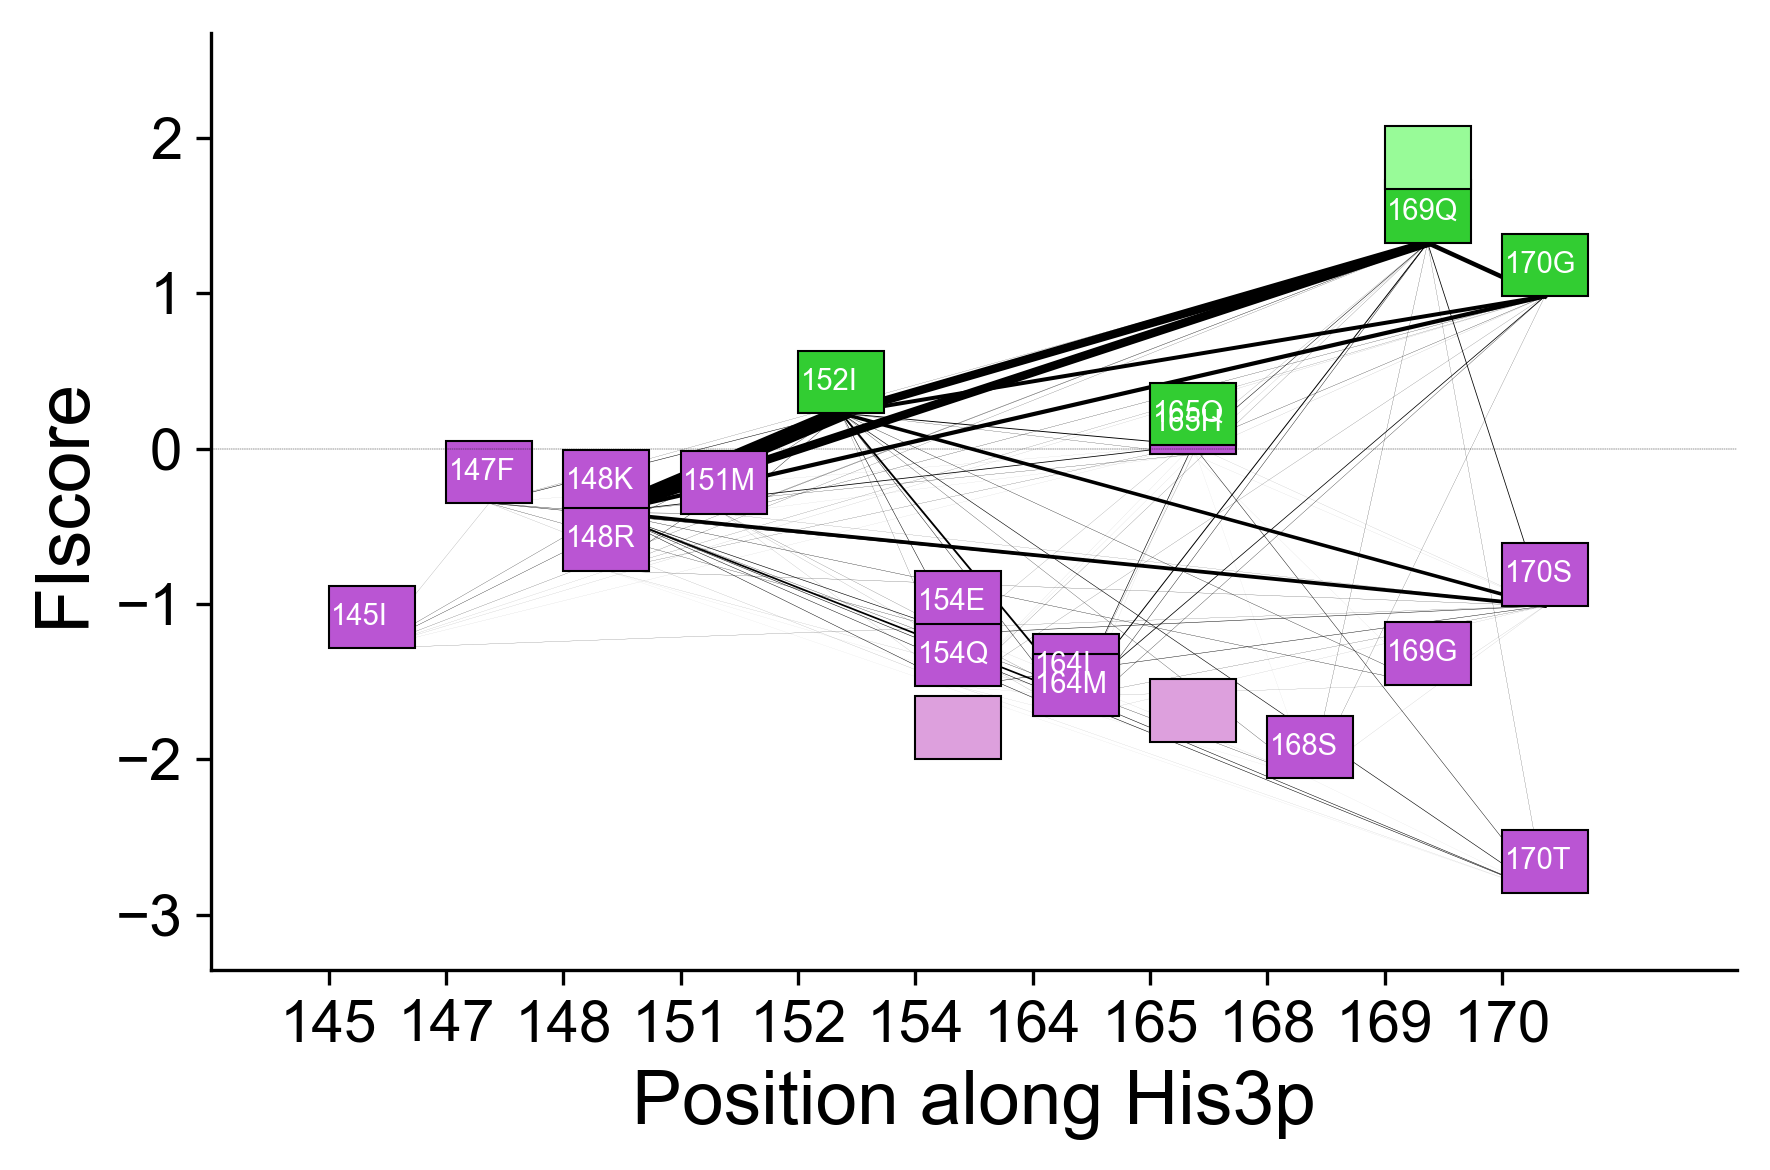

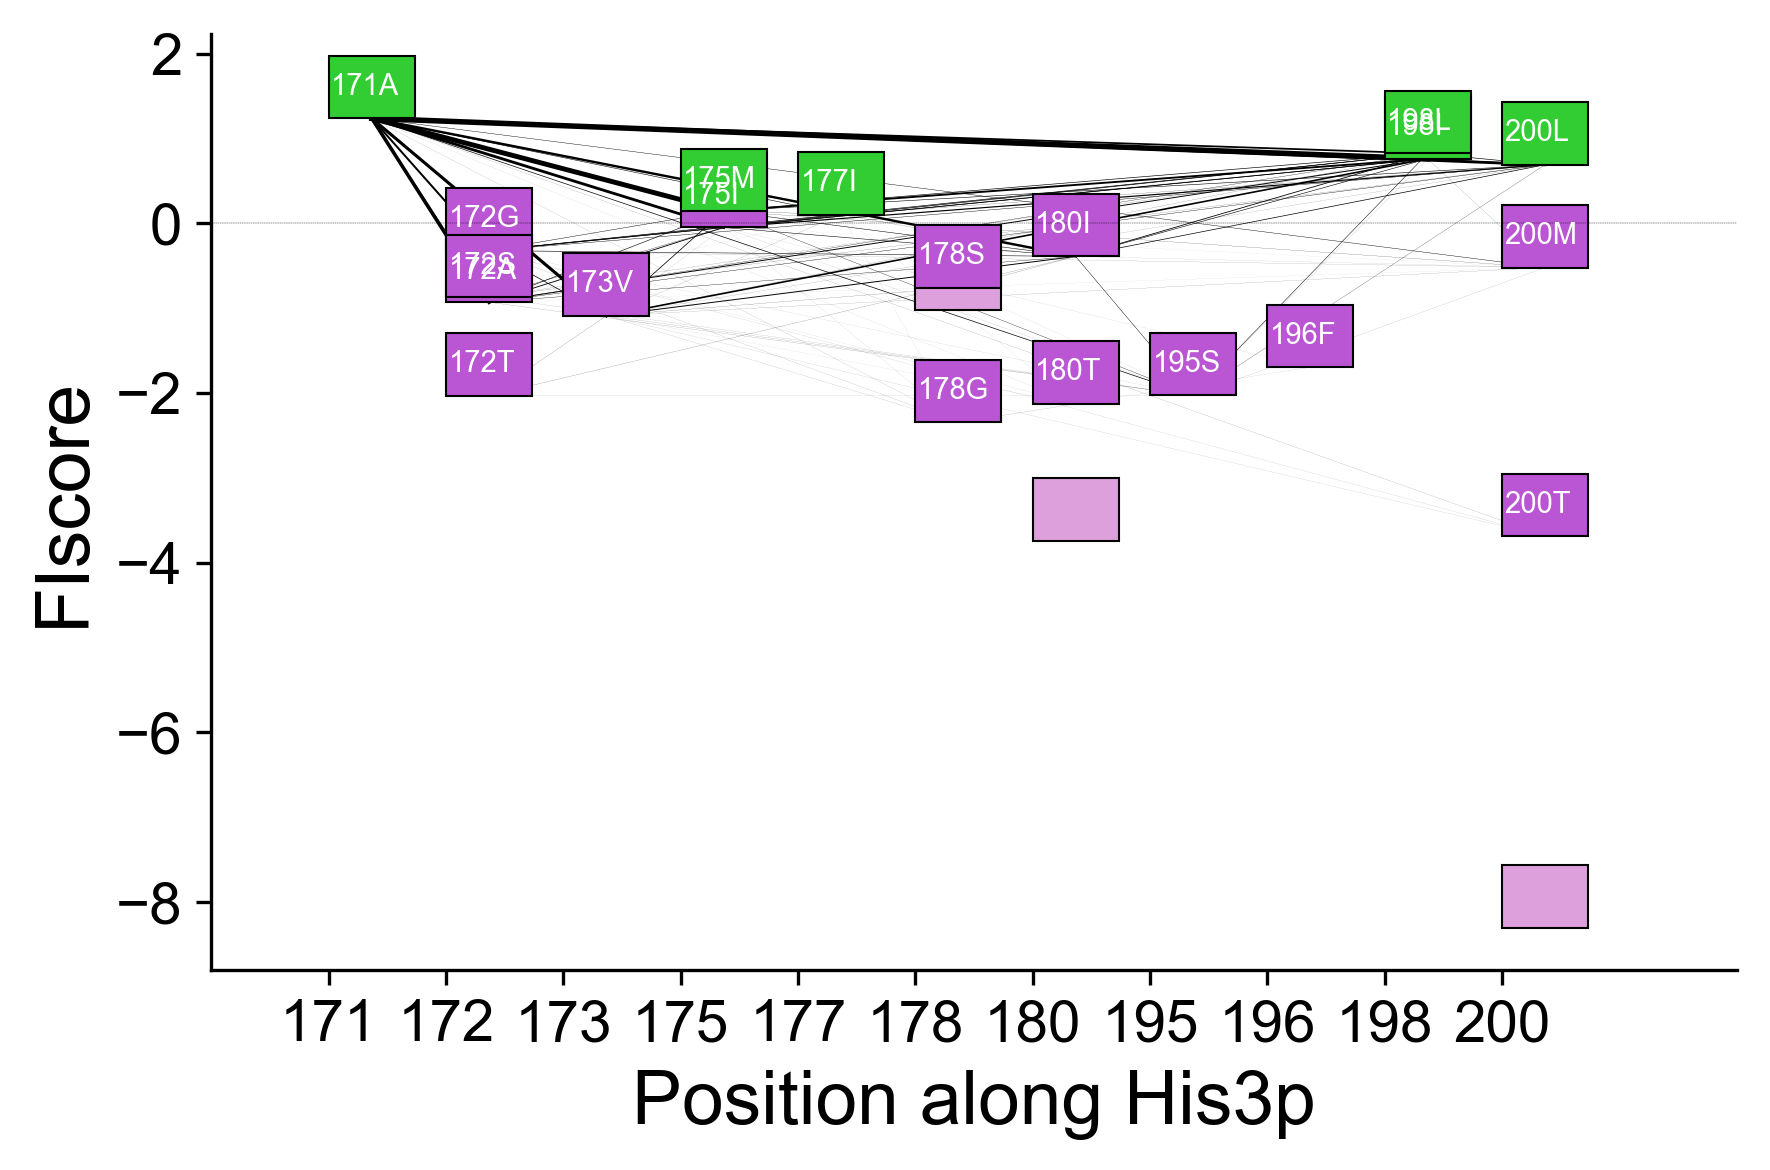

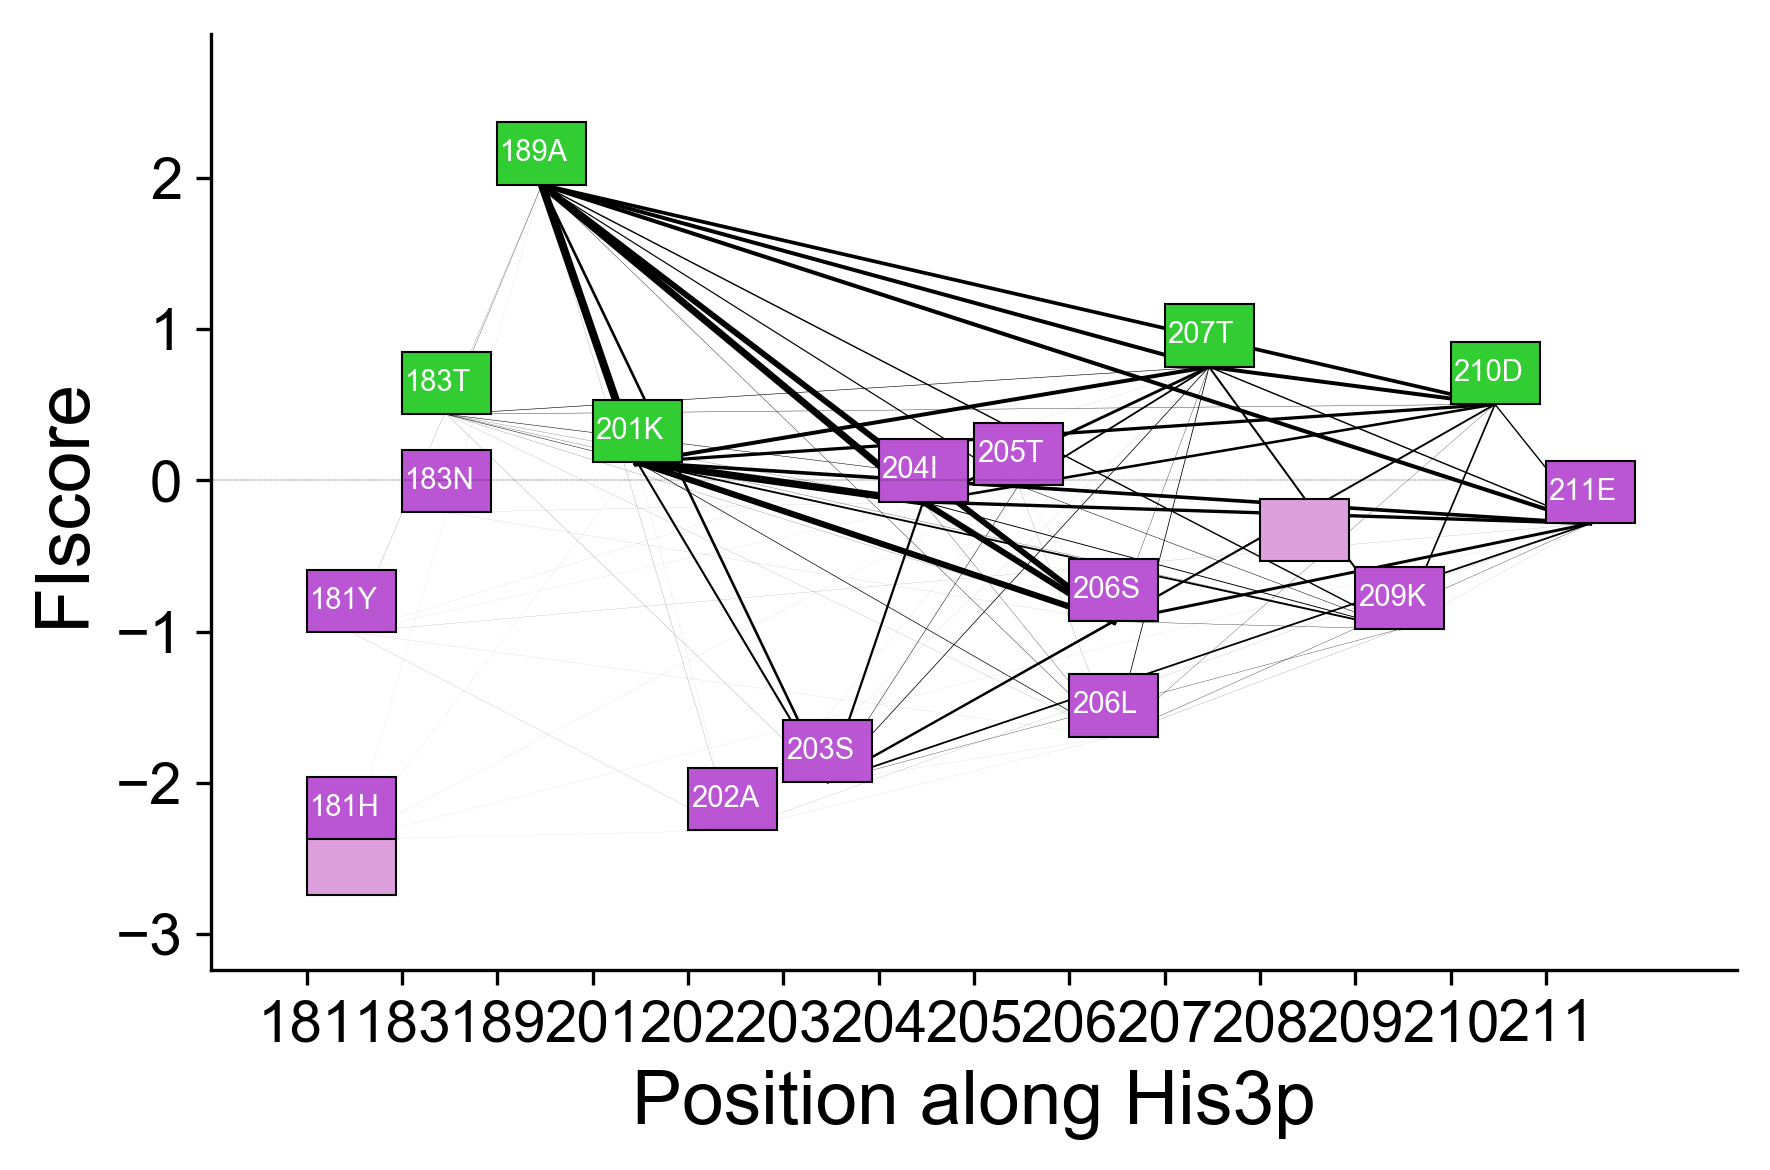

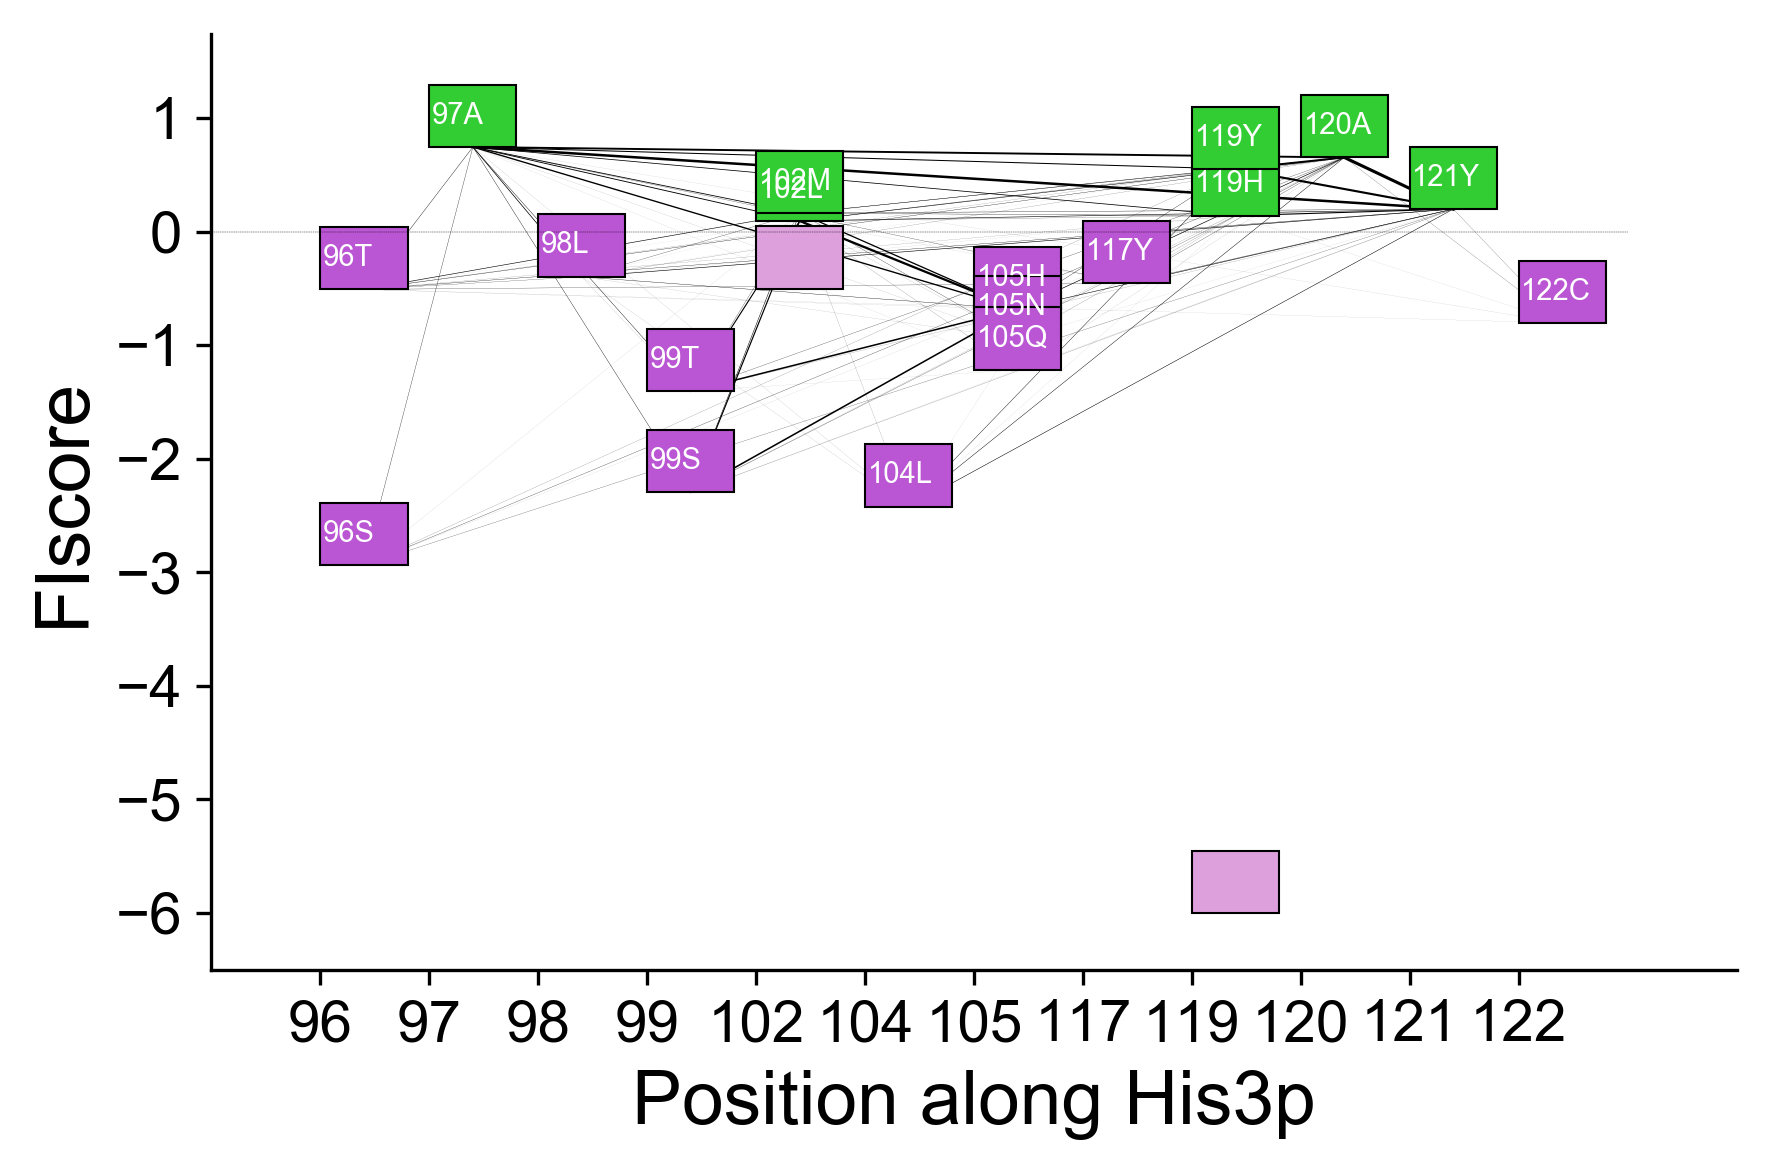

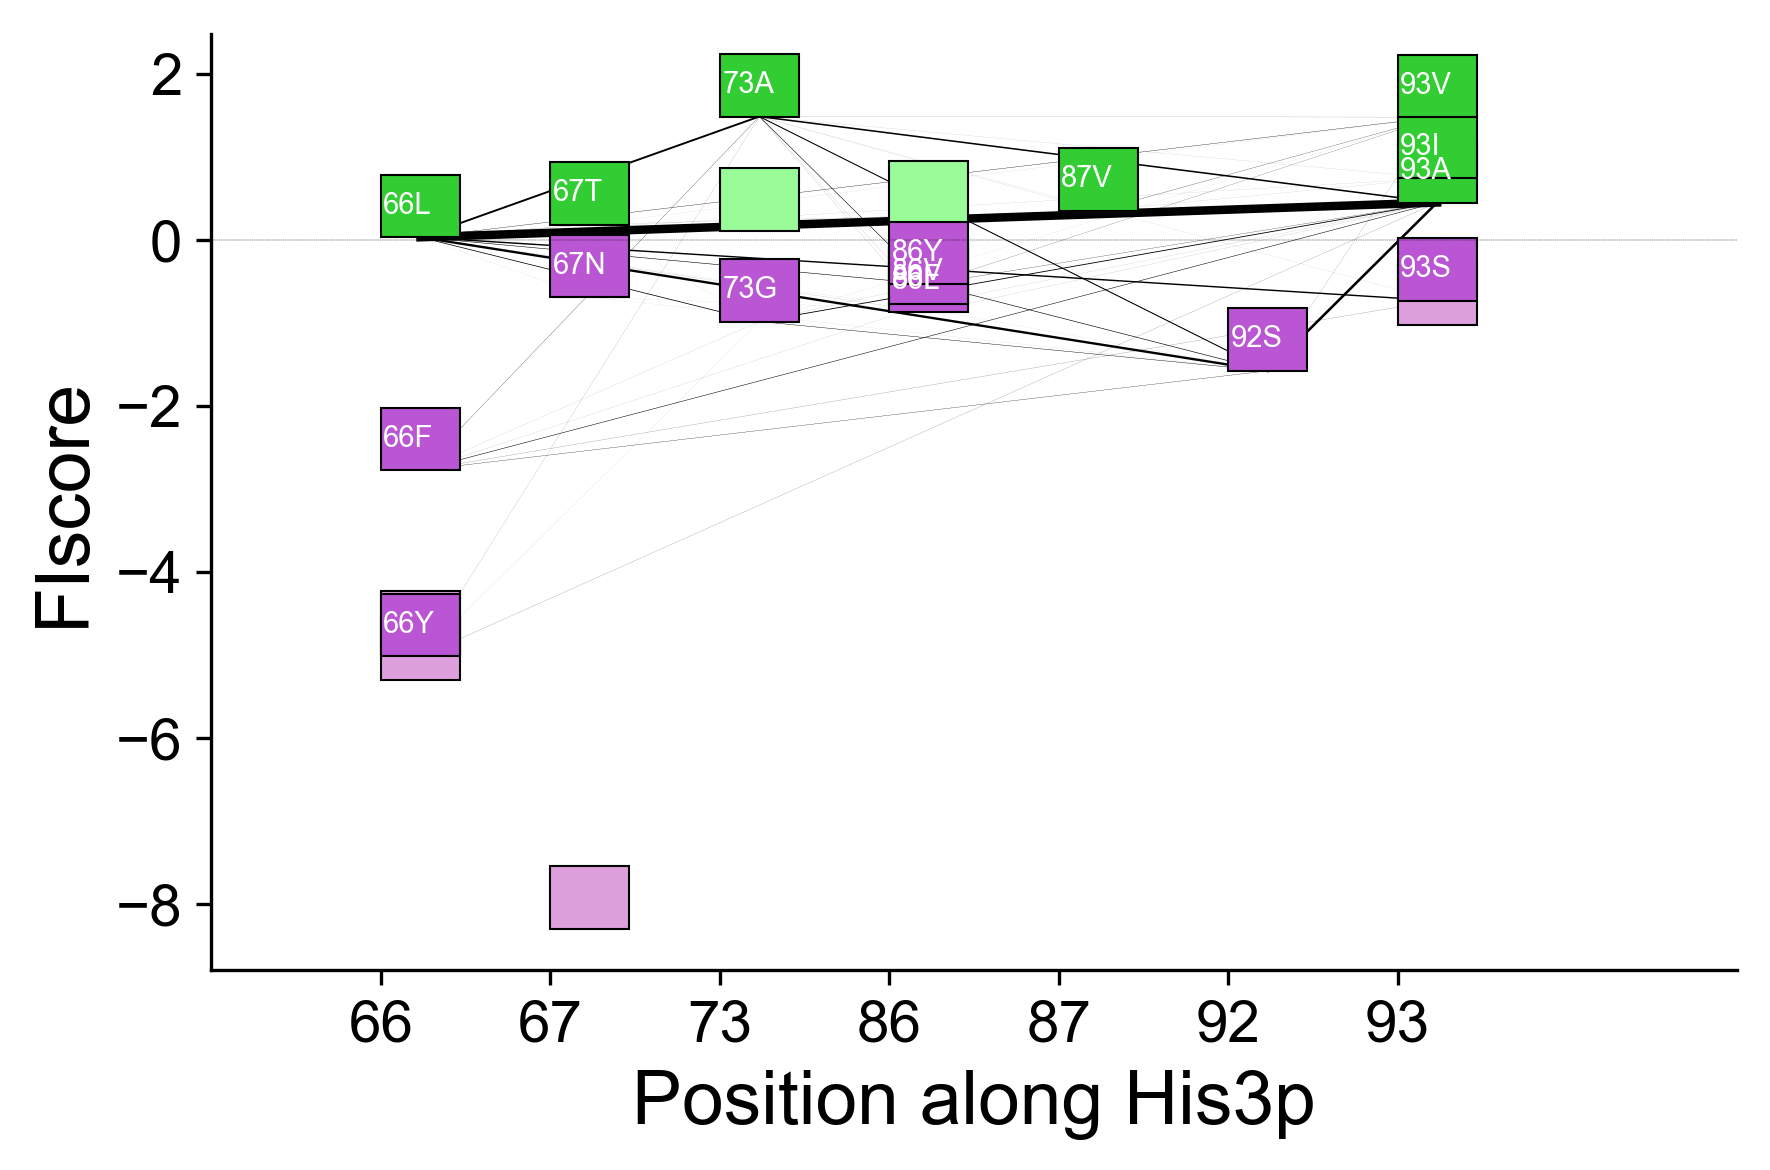

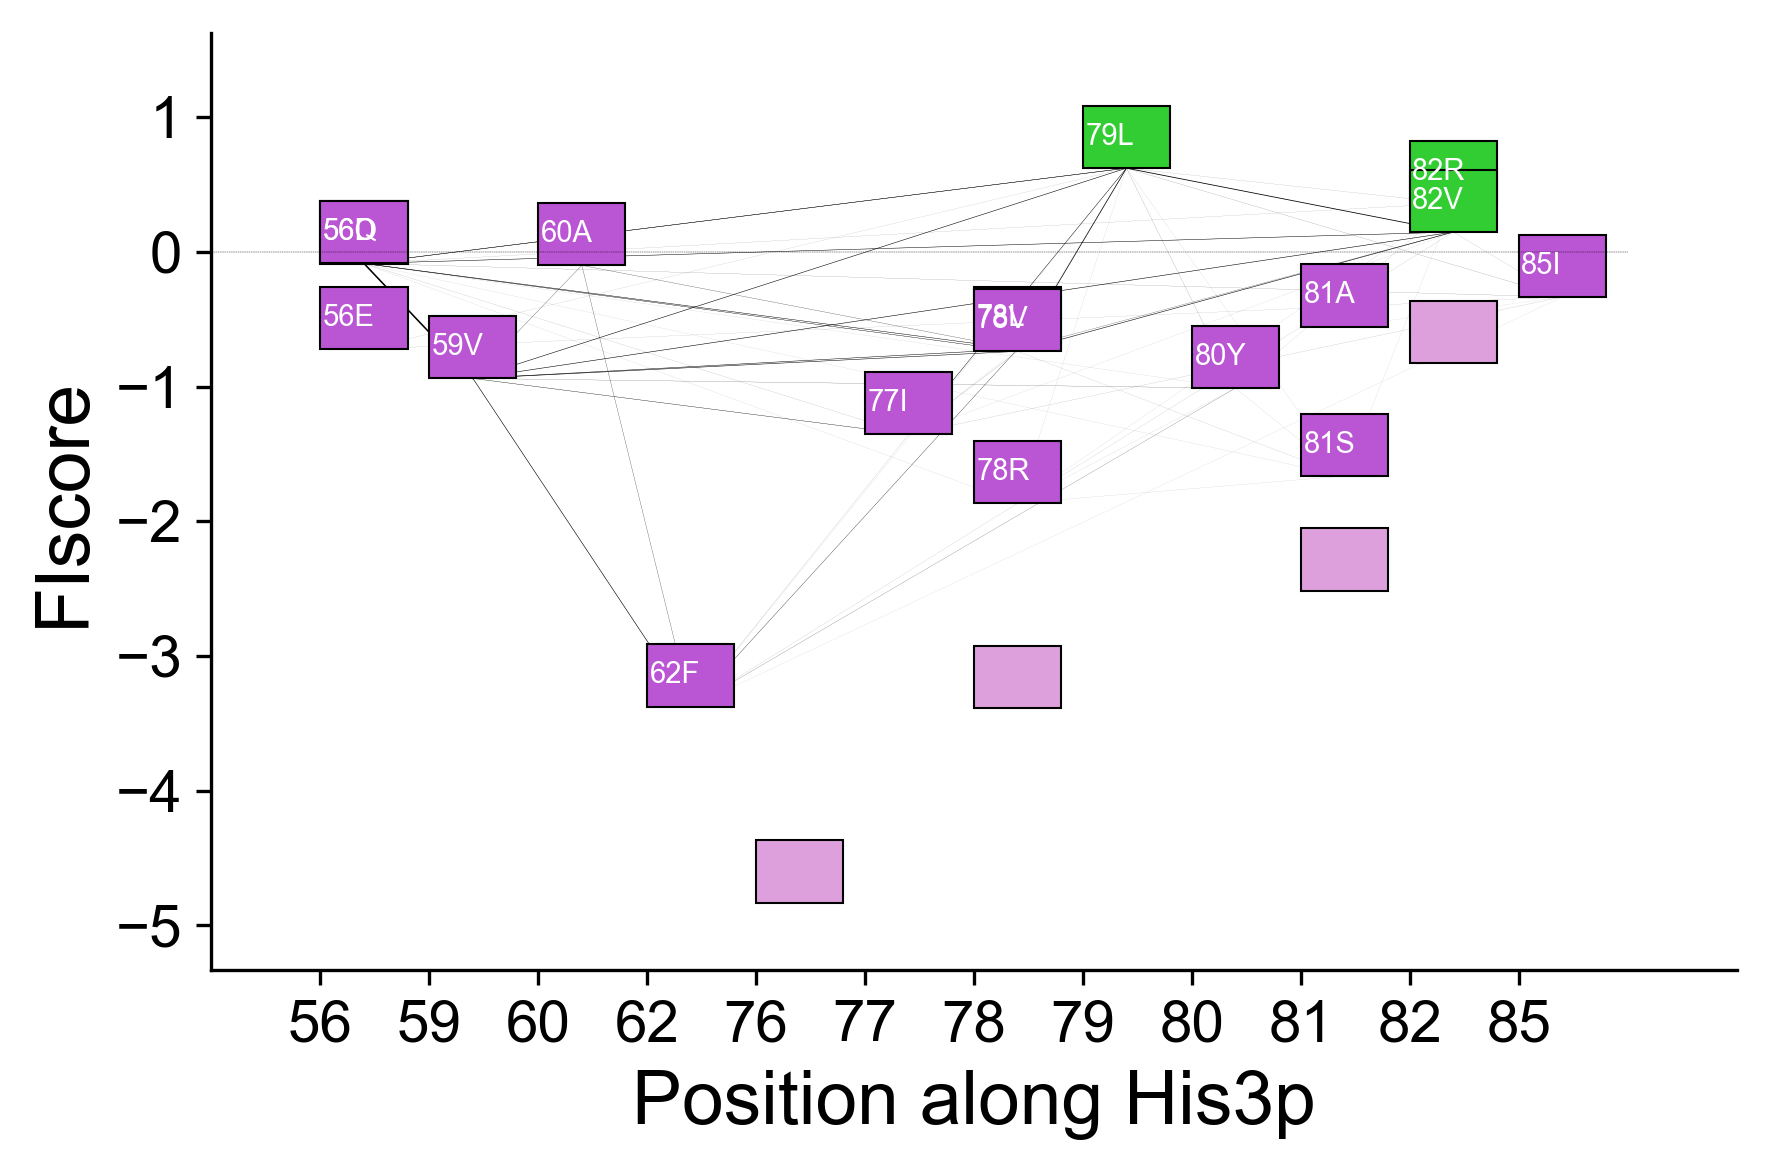

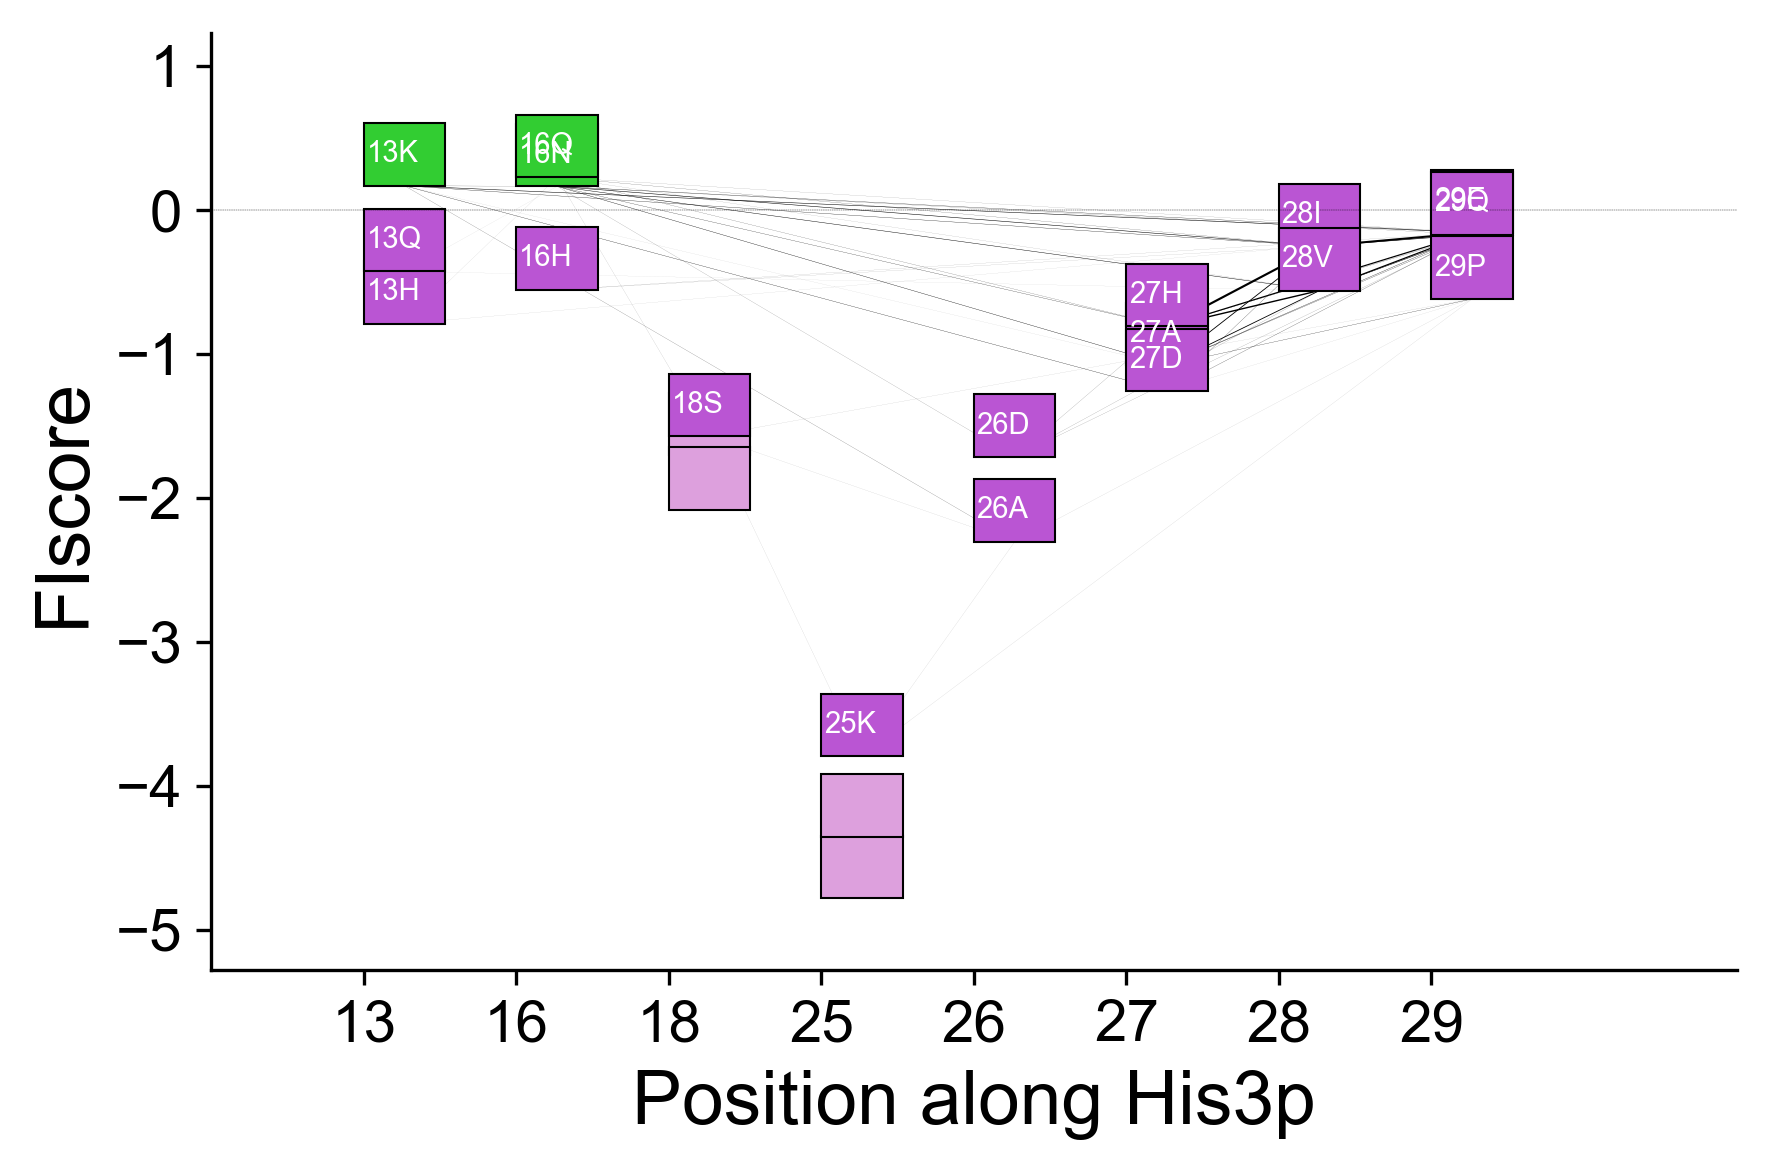

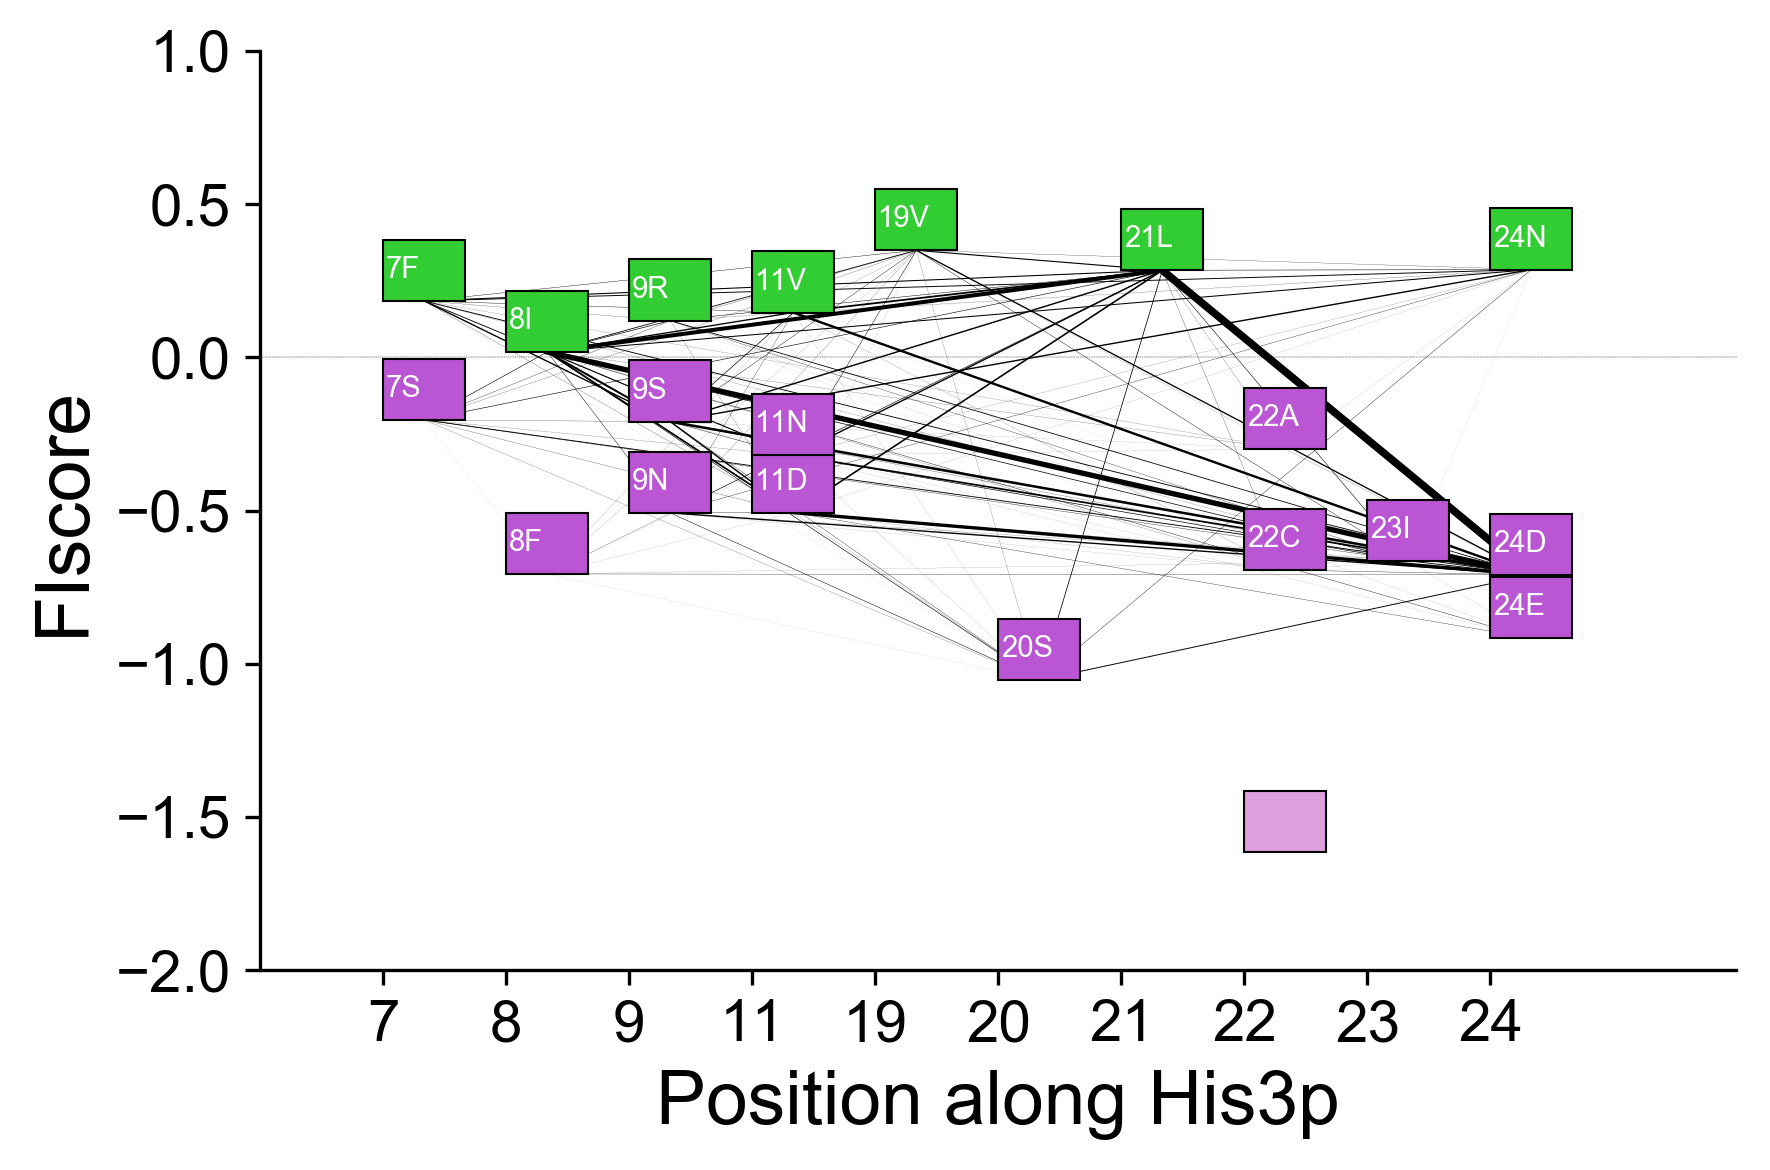

In [88]:
for segN in (1,2,3,4,5,6,7,8,11,12):
    count_pos = 1
    count_neg = 1
    sc_data_singleseg = sc_data[sc_data["segment"] == segN]
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    #modify the lindwidth of the lines 
    
    unique_pos = np.unique(sc_data_singleseg["position"].values)
    unique_pos.sort()
    unique_pos_list = list(unique_pos)
    data_pos_count = len(unique_pos)
    if segN != 12:
        ylim1 = np.min(sc_data_singleseg["FI_mean"].values)-0.5
        ylim2 =  np.max(sc_data_singleseg["FI_mean"].values)+1
    else:
        ylim1 = -2
        ylim2 = 1

    for pos,fiscore,subname in zip(sc_data_singleseg["position"].values, sc_data_singleseg["FI_mean"].values,
                          sc_data_singleseg["AAstate"].values):
        #print(unique_pos_list.index(pos),fiscore,subname)
        if fiscore > 0:
            
            drow_box(unique_pos_list.index(pos), fiscore,ax,subname,count_pos,data_pos_count,ylim2-ylim1)
            count_pos += 1
        else:
            
            drow_box(unique_pos_list.index(pos), fiscore,ax,subname,count_neg,data_pos_count,ylim2-ylim1)
            count_neg += 1

    coexistData_singleseg = coexistData[coexistData["segment"] == segN]
    for single_pair,single_count in zip(coexistData_singleseg["allelePair"].values, coexistData_singleseg["Nsp"].values):
        if single_count < 0:
            continue

        a,b = literal_eval(single_pair)
        add_arrow(a,b,single_count,data_pos_count)




    plt.xlim(-1,len(unique_pos)+1)
    plt.ylim( ylim1,ylim2)
    plt.hlines(0,-2,12,linestyles= "--",linewidth = 0.1)
    plt.xticks(range(len(unique_pos_list)),unique_pos_list,fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.xlabel("Position along His3p",fontsize = 18)
    plt.ylabel("FIscore",fontsize = 18)
    #plt.legend(fontsize = 10, edgecolor='k')    
    #save figure
    plt.tight_layout()
    plt.savefig(savedata_dir + "coexist_seg%d.png"%segN,dpi=300)
